In [26]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Raw_Data_for_train_test.csv")

In [ ]:
df.head()

In [4]:
df.shape

(19372, 50)

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [7]:
df.drop("TARGET_D", axis=1, inplace=True)

In [8]:
df["DONOR_AGE"] = df["DONOR_AGE"].fillna(df["DONOR_AGE"].mean())
df["DONOR_AGE"] = df["DONOR_AGE"].astype("int64")

df["INCOME_GROUP"] = df["INCOME_GROUP"].fillna(df["INCOME_GROUP"].mode()[0])
df["INCOME_GROUP"] = df["INCOME_GROUP"].astype("int64")

df["WEALTH_RATING"] = df["WEALTH_RATING"].fillna(df["WEALTH_RATING"].mode()[0])
df["WEALTH_RATING"] = df["WEALTH_RATING"].astype("int64")

In [14]:
df["SES"] = df["SES"].str.replace("?", "2")
df["SES"] = df["SES"].astype("int64")

df["URBANICITY"] = df["URBANICITY"].str.replace("?", "S")

df["CLUSTER_CODE"] = df["CLUSTER_CODE"].str.replace(".", "40")
df["CLUSTER_CODE"] = df["CLUSTER_CODE"].astype("int64")

In [10]:
df = df.dropna()

In [15]:
df.shape

(19126, 49)

In [ ]:
df.head()

In [17]:
cols = []

for col in df.columns:
    if df[col].dtype == "object":
        cols.append(col)

In [20]:
def label_encoder(column):
    le = LabelEncoder().fit(column)
    print(column.name, le.classes_)
    return le.transform(column)

In [21]:
for col in cols:
    df[col] = label_encoder(df[col])

URBANICITY ['C' 'R' 'S' 'T' 'U']
HOME_OWNER ['H' 'U']
DONOR_GENDER ['A' 'F' 'M' 'U']
OVERLAY_SOURCE ['B' 'M' 'N' 'P']
RECENCY_STATUS_96NK ['A' 'E' 'F' 'L' 'N' 'S']


In [ ]:
sns.barplot(x="TARGET_B", y="IN_HOUSE", data=df)

In [ ]:
sns.countplot(x="TARGET_B", hue="SES", data=df)

In [24]:
X = df.drop("TARGET_B", axis=1)
y = df["TARGET_B"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
ac1 = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
ac2 = accuracy_score(y_test, y_pred)

In [31]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
ac3 = accuracy_score(y_test, y_pred)

In [33]:
names = ["Logistic Regression", "Decision Tree", "Random Forest"]
scores = [ac1, ac2, ac3]

In [34]:
models = pd.DataFrame({"Model": names, "Score": scores})
models.head()

,Model,Score
0,Logistic Regression,0.737324
1,Decision Tree,0.630685
2,Random Forest,0.736278


<AxesSubplot: xlabel='Model', ylabel='Score'>

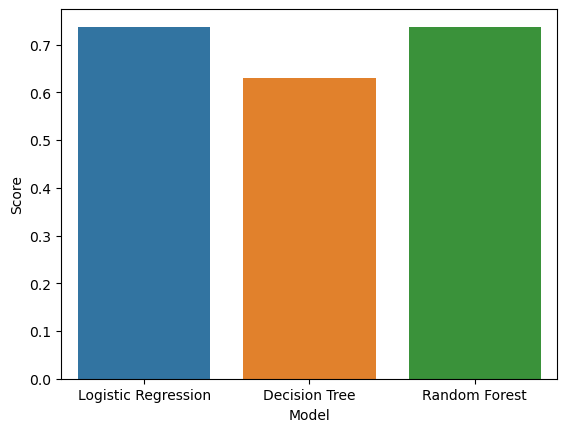

In [37]:
sns.barplot(x="Model", y="Score", data=models)

<AxesSubplot: >

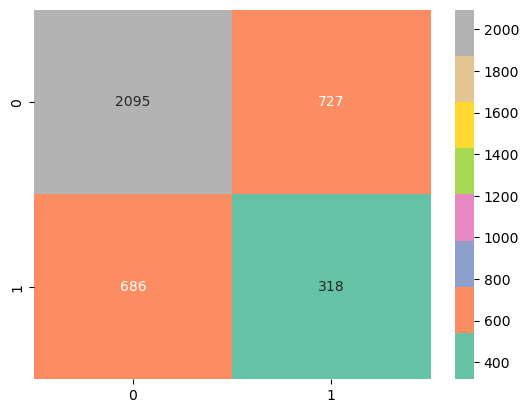

In [38]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Set2")

In [35]:
pickle.dump(rf, open("rf.pkl", "wb"))